# EDA and prediction model - Nocturnal insects

In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading datasets
df = pd.read_csv('/Users/cnieto/Downloads/hackaton job22/train.csv')
df_test = pd.read_csv('/Users/cnieto/Downloads/hackaton job22/test_x.csv')


#### Initial exploration

In [3]:
df.shape

(7001, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7001 non-null   int64  
 1   Hour               7001 non-null   int64  
 2   Minutes            7001 non-null   int64  
 3   Sensor_alpha       7001 non-null   float64
 4   Sensor_beta        7001 non-null   float64
 5   Sensor_gamma       7001 non-null   float64
 6   Sensor_alpha_plus  7001 non-null   float64
 7   Sensor_beta_plus   7001 non-null   float64
 8   Sensor_gamma_plus  7001 non-null   float64
 9   Insect             7001 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 547.1 KB


- 7001 rows, 10 columns. No null values at first sight

In [5]:
df.describe()

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
count,7001.00000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,3500.00000,19.598914,29.405942,0.477171,-29.974117,-5.624690,7.188060,-0.757901,-0.554533,0.595772
std,2021.15895,3.507008,17.375830,99.294856,133.095125,115.871391,122.327980,100.039477,100.535951,0.661604
min,0.00000,1.000000,0.000000,-404.898823,-656.272666,-448.478039,-437.205393,-387.567443,-374.961689,0.000000
25%,1750.00000,19.000000,14.000000,-68.573905,-116.060383,-83.508747,-79.496687,-68.061596,-69.652647,0.000000
50%,3500.00000,21.000000,29.000000,-0.287447,-36.171567,-1.217606,-1.133567,-0.444124,0.027128,0.000000
75%,5250.00000,21.000000,44.000000,66.480795,56.637778,76.870277,93.285286,66.181909,67.838524,1.000000
max,7000.00000,23.000000,59.000000,351.256221,518.395878,378.349287,462.556319,345.279240,363.682391,2.000000


- There is a suspicious column "Unnamed:0". The fact that is min is 0 , it's max is 7000, and it's mean is 3500, tells us that is just an index column that we can drop

In [6]:
df['Unnamed: 0'].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [7]:
df['Unnamed: 0'].tail()

6996    6996
6997    6997
6998    6998
6999    6999
7000    7000
Name: Unnamed: 0, dtype: int64

In [8]:
# we drop the useless column
df.drop('Unnamed: 0',axis=1,inplace=True)

- Overall look at the dataset

In [9]:
df.head()

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


- Two columns represent the time:

In [10]:
df[['Hour','Minutes']]

,Hour,Minutes
0,22,26
1,10,16
2,21,42
3,21,17
4,18,16
...,...,...
6996,21,0
6997,18,57
6998,22,47
6999,18,14


- we will transform these columns to just one datetime column, because it makes more sense since they are telling us the same info

- First we create a new column that merges both Hour and Minutes

In [11]:
df['Time'] = df.Hour.astype(str) + ":" + df.Minutes.astype(str)

In [12]:
df['Time']

0       22:26
1       10:16
2       21:42
3       21:17
4       18:16
        ...  
6996     21:0
6997    18:57
6998    22:47
6999    18:14
7000    21:31
Name: Time, Length: 7001, dtype: object

- Then we convert the column to datetime

In [13]:
df['Time'] = pd.to_datetime(df['Time'],format="%H:%M").dt.time

In [14]:
df['Time'].sample(10)

706     21:05:00
6536    19:55:00
6758    21:41:00
1753    19:43:00
4943    14:07:00
6368    18:48:00
3298    21:52:00
4615    20:09:00
5213    20:04:00
209     20:33:00
Name: Time, dtype: object

- Then we proceed to drop Hour and Minutes columns, since we no longer need them

In [15]:
df.drop(['Hour','Minutes'],axis=1,inplace=True)

In [16]:
df.head()

,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect,Time
0,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2,22:26:00
1,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0,10:16:00
2,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1,21:42:00
3,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0,21:17:00
4,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2,18:16:00


<AxesSubplot:xlabel='time'>

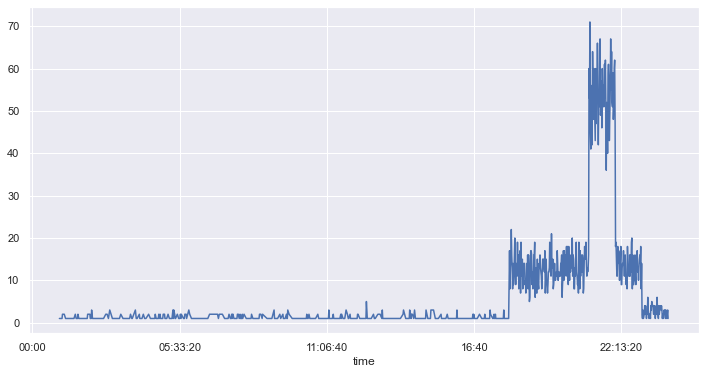

In [17]:
# A look at the new Time feature
sns.set(rc={"figure.figsize":(12, 6)})
df.Time.value_counts().plot()

- Most measures are comprised between 18:00 and 00:00 (makes sense, we are talking about nocturnal insects). That makes me wonder if we can drop registers that do not belong to this time range to increase accuracy of the model.

- Now let's have a look at our Target column, that is Insect

In [18]:
df.Insect.unique()

array([2, 0, 1])

- Looks like there are 3 types of insect we should be able to classify

<AxesSubplot:xlabel='Insect', ylabel='count'>

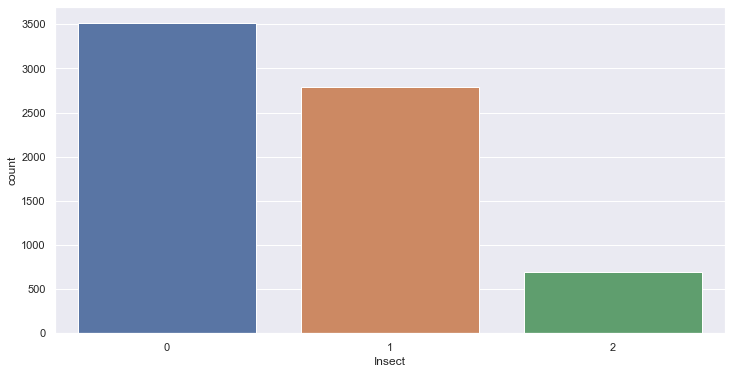

In [19]:
sns.countplot(data=df,x='Insect')

- Although classes 0 and 1 have more or less the same number of registers, class number 2 is a bit underrepresented. We should keep that in mind, that would maybe cause some bias later when doing predictions

- Now we will look at the sensor columns

<AxesSubplot:>

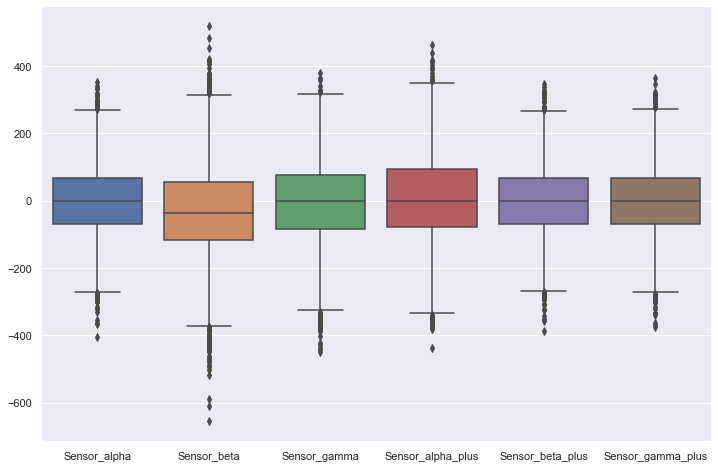

In [20]:
sns.set(rc={"figure.figsize":(12, 8)})
sns.boxplot(data=df[['Sensor_alpha','Sensor_beta','Sensor_gamma','Sensor_alpha_plus','Sensor_beta_plus','Sensor_gamma_plus']])

- Sensors have similiar means, and even similar number of outliers. Maybe sensor_beta has a greater number of outliers, we might need to deal with it too

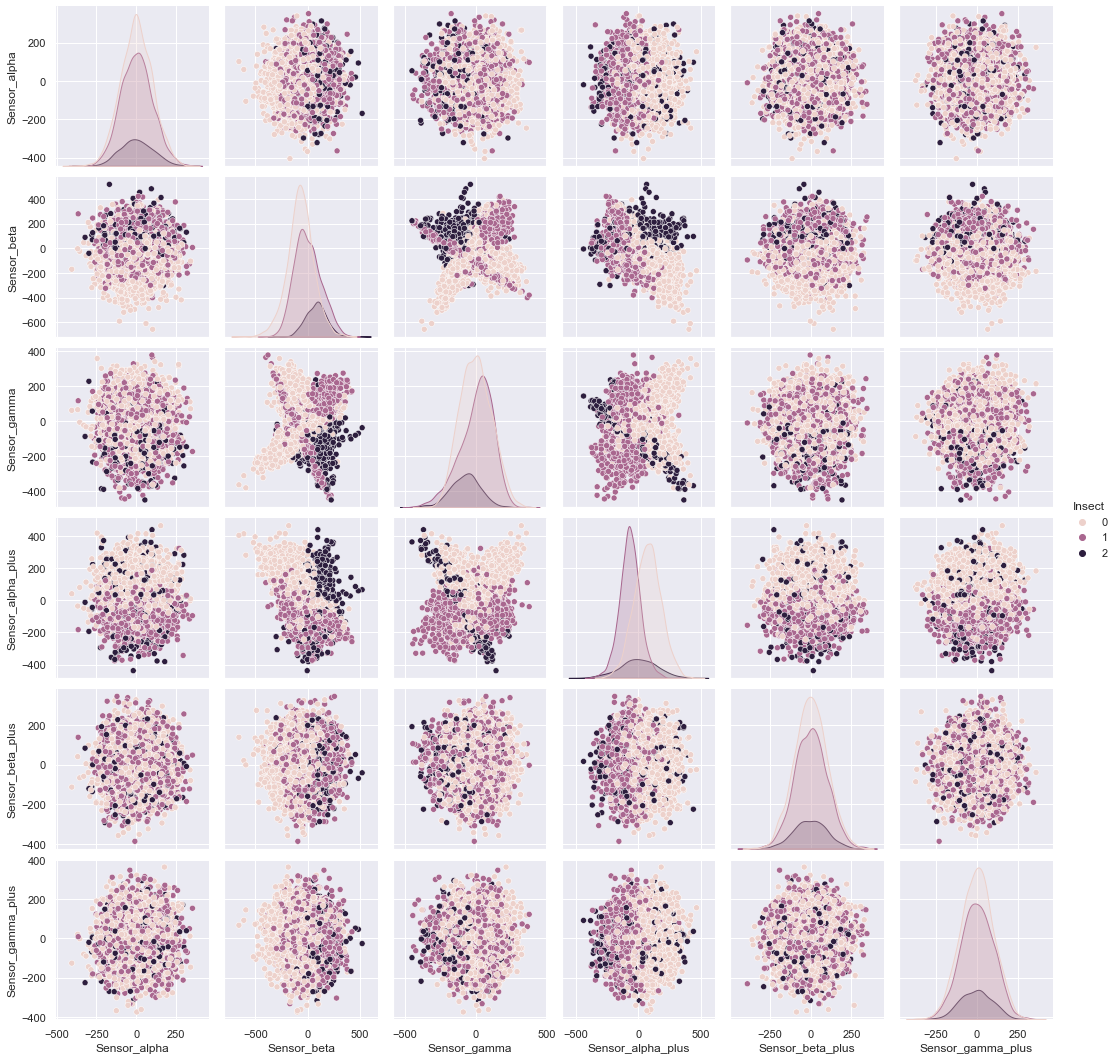

In [21]:
sns.pairplot(data=df,hue='Insect')

- Some sensors seem to show correlation and show some patterns on insect distribution. We will look deeper at their correlations

<AxesSubplot:>

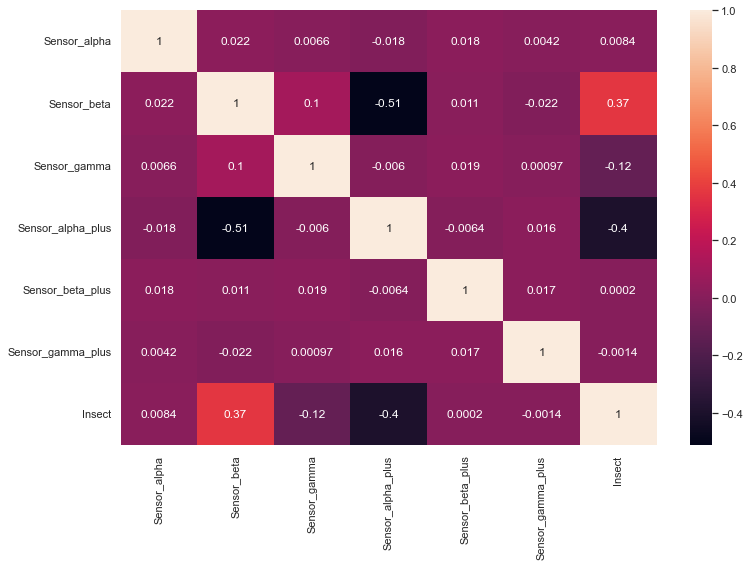

In [22]:
sns.heatmap(data=df.corr(), annot=True)

- Beta and alpha_plus seem to be the two most correlated sensors with Insect. There is low multicolinearality between features

- We will look at the correlation between Time and Insect too with a chisquare test

In [23]:
CrosstabResult=pd.crosstab(index=df['Time'],columns=df['Insect'])
print(CrosstabResult)

Insect    0  1  2
Time             
01:01:00  0  1  0
01:03:00  0  1  0
01:05:00  0  1  0
01:07:00  1  0  0
01:08:00  2  0  0
...      .. .. ..
23:54:00  0  0  3
23:56:00  0  0  1
23:57:00  0  1  1
23:58:00  1  1  1
23:59:00  0  0  1

[774 rows x 3 columns]


In [24]:
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


- Chi square tells us that time has correlation with Insect distribution

## First model

- We will create now our first model and see how it performs. In case its accuracy is not good enough we still have some paths to explore, according to what we saw in the EDA: outlier removal, diurnal hours row removal, data augmentation on insect class 2

In [25]:
#first, a look at test dataset that we will use as validation
df_test.shape

(3000, 9)

In [26]:
df_test.head()

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,7000,21,31,-72.083585,-11.434977,-52.961743,-72.696385,145.299227,-143.856243
1,7001,21,3,-193.619980,40.137081,85.419244,-26.266801,-125.391237,80.904973
2,7002,22,31,42.578382,-51.613402,125.055611,182.136746,-9.726951,-114.913402
3,7003,21,25,-64.150951,287.306752,-70.965473,13.789738,38.187260,137.761691
4,7004,18,11,193.750787,-61.989533,-110.347066,-16.864786,148.541916,232.424616


In [27]:
#apply same transformations to test_dataset:
df_test.drop('Unnamed: 0',axis=1,inplace=True)
df_test['Time'] = df_test.Hour.astype(str) + ":" + df_test.Minutes.astype(str)
df_test['Time'] = pd.to_datetime(df_test['Time'],format="%H:%M").dt.time
df_test.drop(['Hour','Minutes'],axis=1,inplace=True)

In [28]:
df_test.head()

,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Time
0,-72.083585,-11.434977,-52.961743,-72.696385,145.299227,-143.856243,21:31:00
1,-193.619980,40.137081,85.419244,-26.266801,-125.391237,80.904973,21:03:00
2,42.578382,-51.613402,125.055611,182.136746,-9.726951,-114.913402,22:31:00
3,-64.150951,287.306752,-70.965473,13.789738,38.187260,137.761691,21:25:00
4,193.750787,-61.989533,-110.347066,-16.864786,148.541916,232.424616,18:11:00


In [29]:
# To be able to use date time for the model I need to change datetime to be a numeric feature
df.Time = df.Time.apply(lambda x: int(x.strftime("%H%M")))
df_test.Time = df_test.Time.apply(lambda x: int(x.strftime("%H%M")))

### Model creation

In [30]:
#importing modeling libraries
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

In [31]:
select = SelectKBest(f_classif, k=3)

In [32]:
select.fit(df.drop(['Insect','Time'],axis=1),df.Insect)

SelectKBest(k=3)

In [33]:
cols = select.get_support(indices=True)
features_selected = df.iloc[:,cols]
features_selected.columns

Index(['Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus'], dtype='object')

- We will try using 3 sensors + time feature as our first model. The selected sensors are beta and alphaplus

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df[['Sensor_beta', 'Sensor_alpha_plus','Sensor_gamma', 'Time']],df.Insect,test_size=0.2)

- ### GridSearch

- I will perform a gridsearch with 4 of the algorithms that worked for me in the past

In [35]:
classifiers = [ 
    BaggingClassifier(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

In [36]:
BaggingClass_parameters = {
    "classifier__n_estimators":[10,50,100],
    "classifier__max_features":[1, 2, 3, 4, 5],
    "classifier__max_samples" : [0.05, 0.1, 0.2, 0.5]
}
ExtraTreeClass_parameters = {
    'classifier__n_estimators' : [10, 50, 100,200,300],                           
    'classifier__max_features' : [1,2,3]
    
}

RandomForestClass_parameters = {
    "classifier__n_estimators":[10,50,100],
    "classifier__max_depth":[1,2,3,4,5]
    
}

GradientClass_parameters = {
    "classifier__learning_rate":[0.08,0.1,0.2],
    "classifier__max_depth":[1,2,3],
    'classifier__n_estimators':[10, 50, 100,200]   
}

In [37]:
parameters = [
    BaggingClass_parameters,
    ExtraTreeClass_parameters,
    RandomForestClass_parameters,
    GradientClass_parameters

]

In [38]:
estimators = []

for i, classifier in enumerate(classifiers):
    # create a Pipeline object
    print(f'I"m in cycle {i}')
    pipe = Pipeline(steps=[
        ('classifier', classifier)
    ])
    clf = GridSearchCV(pipe,              # model
              param_grid = parameters[i], # hyperparameters
              cv=10)                      # number of folds
    clf.fit(X_train, y_train)
    print("Tuned Hyperparameters for k=10 :", clf.best_params_)
    print("Accuracy :", clf.best_score_)
    # add the clf to the estimators list
    estimators.append((classifier.__class__.__name__, clf))

print(estimators)

I"m in cycle 0
Tuned Hyperparameters for k=10 : {'classifier__max_features': 4, 'classifier__max_samples': 0.5, 'classifier__n_estimators': 100}
Accuracy : 0.8971428571428571
I"m in cycle 1
Tuned Hyperparameters for k=10 : {'classifier__max_features': 3, 'classifier__n_estimators': 300}
Accuracy : 0.9076785714285714
I"m in cycle 2
Tuned Hyperparameters for k=10 : {'classifier__max_depth': 5, 'classifier__n_estimators': 50}
Accuracy : 0.8607142857142855
I"m in cycle 3
Tuned Hyperparameters for k=10 : {'classifier__learning_rate': 0.08, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Accuracy : 0.8944642857142858
[('BaggingClassifier', GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier', BaggingClassifier())]),
             param_grid={'classifier__max_features': [1, 2, 3, 4, 5],
                         'classifier__max_samples': [0.05, 0.1, 0.2, 0.5],
                         'classifier__n_estimators': [10, 50, 100]})), ('ExtraTreesClassifier', GridSe

- The algorithm that scored the best was ExtraTrees classifier with an accuracy of 0.90 which is already pretty decent!. Now I'm going to try to improve this score trying the 3 things I mentioned earlier: outlier removal, irrelevant hours removal, Data augmentation for class 2

### Outlier removal

Using the IQR method to detect and remove outliers

In [39]:
df.columns

Index(['Sensor_alpha', 'Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus',
       'Sensor_beta_plus', 'Sensor_gamma_plus', 'Insect', 'Time'],
      dtype='object')

In [40]:
# create a convenient function that returns indexes for outlier
def iqs(dataset,column):
    Q1 = np.percentile(dataset[column], 25,
                   method = 'midpoint')
    Q3 = np.percentile(dataset[column], 75,
                   method = 'midpoint')
    IQR = Q3 - Q1
    
    # then , define upper and lower thresholds
    upper = Q3 +1.5*IQR
    lower = Q1 - 1.5*IQR
    
    return dataset[(dataset[column] > upper) | (dataset[column] < lower)].index
    

In [41]:
alpha = iqs(df,'Sensor_alpha')
beta = iqs(df,'Sensor_beta')
gamma = iqs(df,'Sensor_gamma')
alpha_p = iqs(df,'Sensor_alpha_plus')
beta_p = iqs(df,'Sensor_beta_plus')
gamma_p = iqs(df,'Sensor_gamma_plus')


In [42]:
outliers = [alpha,beta,gamma,alpha_p,beta_p,gamma_p]


In [43]:
#complete set of outliers
unique_outliers = []
for sensor in outliers:
    for i in sensor:
        unique_outliers.append(i)

#only unique values
unique_outliers = list(set(unique_outliers))
       

In [44]:
print(f'a total of {len(unique_outliers)} rows were labeled as outliers')

a total of 286 rows were labeled as outliers


- remove the outlier rows from the dataframe

In [45]:
df.drop(unique_outliers,axis=0,inplace=True)

In [46]:
df.shape

(6715, 8)

- Run the model with this new dataframe. Using gridsearch but only with the "winning" algorithm ExtraTree, and adding some more parameters to hyper tune.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df[['Sensor_beta', 'Sensor_alpha_plus','Sensor_gamma', 'Time']],df.Insect,test_size=0.2)

In [48]:
classifiers = [ 
    ExtraTreesClassifier()
]

In [49]:
ExtraTreeClass_parameters = {
    'classifier__n_estimators' : [10, 50, 100,200,250,300],                           
    'classifier__max_features' : [1,2,3,4,5]
}

In [50]:
parameters = [
    ExtraTreeClass_parameters
]

In [51]:
estimators = []

for i, classifier in enumerate(classifiers):
    # create a Pipeline object
    print(f'I"m in cycle {i}')
    pipe = Pipeline(steps=[
        ('classifier', classifier)
    ])
    clf = GridSearchCV(pipe,              # model
              param_grid = parameters[i], # hyperparameters
              cv=10)                      # number of folds
    clf.fit(X_train, y_train)
    print("Tuned Hyperparameters for k=10 :", clf.best_params_)
    print("Accuracy :", clf.best_score_)
    # add the clf to the estimators list
    estimators.append((classifier.__class__.__name__, clf))

print(estimators)

I"m in cycle 0
Tuned Hyperparameters for k=10 : {'classifier__max_features': 3, 'classifier__n_estimators': 250}
Accuracy : 0.9097173475109551
[('ExtraTreesClassifier', GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier', ExtraTreesClassifier())]),
             param_grid={'classifier__max_features': [1, 2, 3, 4, 5],
                         'classifier__n_estimators': [10, 50, 100, 200, 250,
                                                      300]}))]


- The result barely changes, it's still 0.90 . Next I follow up with dropping rows that belong to diurnal hours

### Only nocturnal insects

<AxesSubplot:xlabel='Time'>

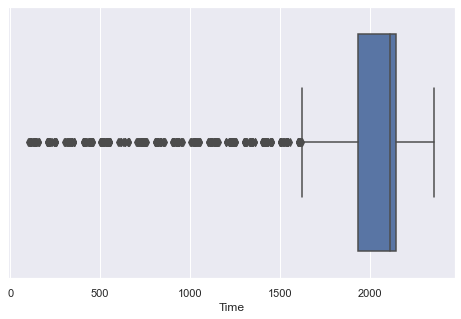

In [52]:
sns.set(rc={"figure.figsize":(8, 5)})
sns.boxplot(data=df,x='Time')

- Most measures are located between 16:00 and 23:59. I will drop rows with Time below 1600 and see if that helps the model

In [53]:
print(f' number of rows belonging to "diurnal" hours: {len(df[df.Time < 1600].index)}')

 number of rows belonging to "diurnal" hours: 453


In [54]:
df_noct = df.drop(df[df.Time < 1600].index,axis = 0)

In [55]:
df_noct.shape

(6262, 8)

- Run the model again

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_noct[['Sensor_beta', 'Sensor_alpha_plus','Sensor_gamma', 'Time']],df_noct.Insect,test_size=0.2)

In [57]:
classifiers = [ 
    ExtraTreesClassifier()
]

In [58]:
ExtraTreeClass_parameters = {
    'classifier__n_estimators' : [10, 50, 100,200,250,300],                           
    'classifier__max_features' : [1,2,3,4,5]
}

In [59]:
parameters = [
    ExtraTreeClass_parameters
]

In [60]:
estimators = []

for i, classifier in enumerate(classifiers):
    # create a Pipeline object
    print(f'I"m in cycle {i}')
    pipe = Pipeline(steps=[
        ('classifier', classifier)
    ])
    clf = GridSearchCV(pipe,              # model
              param_grid = parameters[i], # hyperparameters
              cv=10)                      # number of folds
    clf.fit(X_train, y_train)
    print("Tuned Hyperparameters for k=10 :", clf.best_params_)
    print("Accuracy :", clf.best_score_)
    # add the clf to the estimators list
    estimators.append((classifier.__class__.__name__, clf))

print(estimators)

I"m in cycle 0
Tuned Hyperparameters for k=10 : {'classifier__max_features': 1, 'classifier__n_estimators': 200}
Accuracy : 0.9053728542914172
[('ExtraTreesClassifier', GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier', ExtraTreesClassifier())]),
             param_grid={'classifier__max_features': [1, 2, 3, 4, 5],
                         'classifier__n_estimators': [10, 50, 100, 200, 250,
                                                      300]}))]


- Barely changing, if anything it decreased a bit in comparision with the last gridsearch

### Data augmentation

- As shown earlier, insects of class 2 are underrepresented, so I will use some data augmentation to balance it

In [105]:
# SMOTE method to balance the target feature
from imblearn.over_sampling import BorderlineSMOTE

In [106]:
bsmo = BorderlineSMOTE()

In [178]:
X_train, X_test, y_train, y_test = train_test_split(df[['Sensor_beta', 'Sensor_alpha_plus','Sensor_gamma', 'Time']],df.Insect,test_size=0.1)

In [179]:
X_train, y_train = bsmo.fit_resample(X_train,y_train)

In [180]:
# Balanced target
y_train.value_counts()

1    3054
2    3054
0    3054
Name: Insect, dtype: int64

- Run the gridsearch again

In [181]:
classifiers = [ 
    ExtraTreesClassifier()
]

In [182]:
ExtraTreeClass_parameters = {
    'classifier__n_estimators' : [10, 50, 100,200,250,300],                           
    'classifier__max_features' : [1,2,3,4,5]
}

In [183]:
parameters = [
    ExtraTreeClass_parameters
]

In [184]:
estimators = []

for i, classifier in enumerate(classifiers):
    # create a Pipeline object
    print(f'I"m in cycle {i}')
    pipe = Pipeline(steps=[
        ('classifier', classifier)
    ])
    clf = GridSearchCV(pipe,              # model
              param_grid = parameters[i], # hyperparameters
              cv=10)                      # number of folds
    clf.fit(X_train, y_train)
    print("Tuned Hyperparameters for k=10 :", clf.best_params_)
    print("Accuracy :", clf.best_score_)
    # add the clf to the estimators list
    estimators.append((classifier.__class__.__name__, clf))

print(estimators)

I"m in cycle 0
Tuned Hyperparameters for k=10 : {'classifier__max_features': 4, 'classifier__n_estimators': 200}
Accuracy : 0.9375697047044425
[('ExtraTreesClassifier', GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier', ExtraTreesClassifier())]),
             param_grid={'classifier__max_features': [1, 2, 3, 4, 5],
                         'classifier__n_estimators': [10, 50, 100, 200, 250,
                                                      300]}))]


- Much better! 0.93 is looking really good

#### Model Validation

- We will run a classification report to see how well our model is able to classify the 3 classes of insects

In [185]:
from sklearn.metrics import accuracy_score,f1_score, classification_report

In [186]:
model = ExtraTreesClassifier(max_features=4, n_estimators=200)

In [187]:
model.fit(X_train,y_train)

ExtraTreesClassifier(max_features=4, n_estimators=200)

In [188]:
y_pred = model.predict(X_test)

In [189]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       328
           1       0.95      0.96      0.95       283
           2       0.79      0.72      0.75        61

    accuracy                           0.93       672
   macro avg       0.89      0.87      0.88       672
weighted avg       0.92      0.93      0.92       672



- As we can see, class 2 has the lowest precision/recall, although I have compensated it with Data augmentation. Precion on classes 0 and 1 are pretty good

### Predicting results

In [190]:
test_pred = model.predict(df_test[['Sensor_beta','Sensor_alpha_plus','Sensor_gamma','Time']])

<AxesSubplot:ylabel='count'>

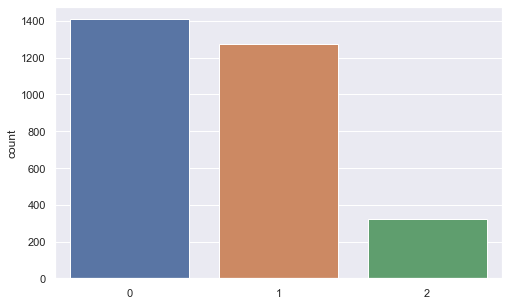

In [191]:
sns.countplot(test_pred)

- Predicted distribution is similar to the train dataset

In [192]:
df_test['Insect_class'] = test_pred

In [193]:
df_test.head()

,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Time,Insect_class
0,-72.083585,-11.434977,-52.961743,-72.696385,145.299227,-143.856243,2131,1
1,-193.619980,40.137081,85.419244,-26.266801,-125.391237,80.904973,2103,1
2,42.578382,-51.613402,125.055611,182.136746,-9.726951,-114.913402,2231,0
3,-64.150951,287.306752,-70.965473,13.789738,38.187260,137.761691,2125,2
4,193.750787,-61.989533,-110.347066,-16.864786,148.541916,232.424616,1811,0


- We export only the column with the results as requested in the challenge

In [194]:
df_test[['Insect_class']].to_csv('results.csv')